In [1]:
import pandas as pd
import numpy as np
import os
import re
import operator
import matplotlib.pyplot as plt

In [2]:
os.listdir(r"F:/Coding Ninjas ML/Projects/20_newsgroups")

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [4]:
X = []
Y = []
for category in os.listdir(r"F:/Coding Ninjas ML/Projects/20_newsgroups"):
    for document in os.listdir(r"F:/Coding Ninjas ML/Projects/20_newsgroups/"+category):
        print(document)
        with open("F:/Coding Ninjas ML/Projects/20_newsgroups/"+category+"/"+document ,"r") as f:
            X.append((document, f.read()))
            Y.append(category)

49960
51060
51119
51120
51121
51122
51123
51124
51125
51126
51127
51128
51129
51130
51131
51132
51133
51134
51135
51136
51137
51138
51139
51140
51141
51142
51143
51144
51145
51146
51147
51148
51149
51150
51151
51152
51153
51154
51155
51156
51157
51158
51159
51160
51161
51162
51163
51164
51165
51166
51167
51168
51169
51170
51171
51172
51173
51174
51175
51176
51177
51178
51179
51180
51181
51182
51183
51184
51185
51186
51187
51188
51189
51190
51191
51192
51193
51194
51195
51196
51197
51198
51199
51200
51201
51202
51203
51204
51205
51206
51207
51208
51209
51210
51211
51212
51213
51214
51215
51216
51217
51218
51219
51220
51221
51222
51223
51224
51225
51226
51227
51228
51229
51230
51231
51232
51233
51234
51235
51236
51237
51238
51239
51240
51241
51242
51243
51244
51245
51246
51247
51248
51249
51250
51251
51252
51253
51254
51255
51256
51257
51258
51259
51260
51261
51262
51264
51265
51266
51267
51268
51269
51270
51271
51272
51273
51274
51275
51276
51277
51278
51279
51280
51281
51282
51283
5128

38546
38547
38548
38549
38550
38551
38552
38553
38554
38555
38556
38557
38558
38559
38560
38561
38562
38563
38564
38565
38566
38567
38568
38569
38570
38571
38572
38573
38574
38575
38576
38577
38578
38579
38580
38581
38582
38583
38584
38585
38586
38587
38588
38589
38590
38591
38592
38593
38594
38595
38596
38597
38598
38599
38600
38601
38602
38603
38604
38605
38606
38607
38608
38609
38610
38611
38612
38613
38614
38615
38616
38617
38618
38619
38620
38621
38622
38623
38624
38625
38626
38627
38628
38629
38630
38631
38632
38633
38634
38635
38636
38637
38638
38639
38640
38641
38642
38643
38644
38645
38646
38647
38648
38649
38650
38651
38652
38653
38654
38655
38656
38657
38658
38659
38660
38661
38662
38663
38664
38665
38666
38667
38668
38669
38670
38671
38672
38673
38674
38675
38676
38677
38678
38679
38680
38681
38682
38683
38684
38685
38686
38687
38688
38689
38690
38691
38692
38693
38694
38695
38696
38697
38698
38699
38700
38701
38702
38703
38704
38705
38706
38707
38708
38709
38710
38711
3871

9832
9833
9834
9835
9836
9837
9838
9839
9840
9841
9842
9843
9844
9845
9846
9847
9848
9849
9850
9851
9852
9853
9854
9855
9856
9857
9858
9859
9860
9861
9862
9863
9864
9865
9866
9867
9868
9869
9870
9871
9872
9873
9874
9875
9876
9877
9878
9879
9880
9881
9882
9883
9884
9885
9886
9887
9888
9889
9890
9891
9892
9893
9894
9895
9896
9897
9898
9899
9900
9901
9902
9903
9904
9905
9906
9907
9908
9909
9910
9911
9912
9913
9914
9915
9916
9917
9918
9919
9920
9921
9922
9923
9924
9925
9926
9927
9928
9929
9930
9931
9932
9933
9934
9935
9936
9937
9938
9939
9940
9941
9942
9943
9944
9945
9946
9947
9948
9949
9950
9951
9952
9953
9954
9955
9956
9957
9958
9959
9960
9961
9962
9963
9964
9965
9966
9967
9968
9969
9970
9971
9972
9973
9974
9975
9976
9977
9978
9979
9980
9981
9982
9983
9984
9985
9986
9987
9988
9989
9990
9991
9992
9993
9994
9995
9996
9997
9998
9999
58343
58826
58827
58828
58829
58830
58831
58832
58833
58834
58835
58836
58837
58838
58839
58840
58841
58842
58843
58860
58862
58902
58903
58904
58905
58906
5890

51601
51602
51603
51604
51605
51606
51607
51608
51609
51610
51611
51612
51613
51614
51615
51616
51617
51618
51619
51620
51621
51622
51623
51624
51625
51626
51627
51628
51629
51630
51631
51632
51633
51634
51635
51636
51637
51638
51639
51640
51641
51642
51643
51644
51645
51646
51647
51648
51649
51650
51651
51652
51653
51654
51655
51656
51657
51658
51659
51660
51661
51662
51663
51664
51665
51666
51667
51668
51669
51670
51671
51672
51673
51674
51675
51676
51677
51678
51679
51680
51681
51682
51683
51684
51685
51686
51687
51688
51689
51690
51691
51692
51693
51694
51695
51697
51698
51699
51700
51701
51702
51703
51704
51705
51706
51707
51708
51709
51710
51711
51712
51713
51714
51715
51716
51717
51718
51719
51720
51721
51722
51723
51724
51725
51726
51727
51728
51729
51730
51731
51732
51733
51734
51735
51736
51737
51738
51739
51740
51741
51742
51743
51744
51745
51746
51747
51748
51749
51750
51751
51752
51753
51754
51755
51756
51757
51758
51759
51760
51761
51762
51763
51764
51765
51766
51767
5176

67402
67403
67404
67405
67406
67407
67408
67409
67410
67411
67412
67413
67414
67415
67416
67417
67418
67419
67420
67421
67422
67423
67424
67425
67426
67428
67429
67430
67431
67432
67433
67434
67435
67436
67437
67438
67439
67440
67441
67442
67443
67444
67445
67446
67447
67448
67449
67450
67451
67452
67453
67454
67455
67456
67457
67458
67459
67460
67461
67462
67463
67464
67465
67466
67467
67468
67469
67470
67471
67472
67473
67474
67475
67476
67477
67478
67479
67480
67481
67482
67483
67484
67485
67486
67487
67488
67489
67490
67491
67492
67493
67494
67495
67496
67497
67498
67499
67500
67501
67502
67503
67504
67505
67506
67507
67508
67509
67510
67511
67512
67513
67514
67515
67516
67517
67518
67519
67520
67521
67522
67523
67524
67525
67526
67527
67528
67529
67530
67531
67532
67533
67534
67535
67536
67537
67538
67539
67540
67541
67542
67543
67544
67545
67546
67547
67548
67549
67550
67551
67552
67553
67554
67555
67556
67557
67558
67559
67560
67561
67562
67563
67564
67565
67566
67567
67568
6757

76881
76882
76901
76902
76918
76927
76935
76936
76937
76938
76939
76940
76941
76942
76943
76944
76945
77014
77056
101551
101552
101553
101554
101555
101556
101557
101558
101559
101560
101561
101562
101563
101564
101565
101566
101567
101568
101569
101570
101571
101572
101573
101574
101575
101576
101577
101578
101579
101580
101581
101582
101583
101584
101585
101586
101587
101588
101589
101590
101591
101592
101593
101594
101595
101596
101597
101598
101599
101600
101601
101602
101603
101604
101605
101606
101607
101608
101609
101610
101611
101612
101613
101614
101615
101616
101617
101618
101619
101620
101621
101622
101623
101624
101625
101626
101627
101628
101629
101630
101631
101632
101633
101634
101635
101636
101637
101638
101639
101640
101641
101642
101643
101644
101645
101646
101647
101648
101650
101651
101652
101653
101654
101655
101656
101657
101658
101659
101660
101661
101662
101663
101664
101665
101666
101667
101668
101669
101670
101671
101672
101673
101674
101675
101676
101677
1016

104315
104316
104317
104318
104319
104320
104321
104322
104323
104324
104325
104326
104327
104328
104329
104330
104331
104332
104333
104334
104335
104336
104337
104338
104339
104340
104341
104342
104343
104344
104345
104346
104347
104348
104349
104350
104351
104352
104353
104354
104355
104356
104357
104358
104359
104360
104361
104362
104363
104364
104365
104366
104367
104368
104369
104370
104371
104372
104373
104374
104375
104376
104377
104378
104379
104380
104381
104382
104383
104384
104385
104386
104387
104388
104389
104390
104391
104392
104393
104394
104395
104396
104397
104398
104399
104400
104401
104402
104403
104404
104405
104406
104407
104408
104409
104410
104411
104412
104413
104414
104415
104416
104417
104418
104419
104420
104421
104422
104423
104424
104425
104426
104427
104428
104429
104430
104431
104432
104433
104434
104435
104436
104437
104438
104439
104440
104441
104442
104443
104444
104445
104446
104447
104448
104449
104450
104451
104452
104453
104454
104455
104456
104457

104505
104506
104507
104508
104509
104510
104511
104512
104513
104514
104515
104516
104517
104518
104519
104520
104521
104522
104523
104524
104525
104526
104527
104528
104529
104530
104531
104532
104533
104534
104535
104536
104537
104538
104539
104540
104541
104542
104543
104544
104545
104546
104547
104548
104549
104550
104551
104552
104553
104554
104555
104556
104557
104558
104559
104560
104561
104562
104563
104564
104565
104566
104567
104568
104569
104570
104571
104572
104573
104574
104575
104576
104577
104578
104579
104580
104581
104582
104583
104584
104585
104586
104587
104588
104589
104590
104591
104592
104593
104594
104595
104596
104597
104598
104599
104600
104601
104602
104603
104604
104605
104606
104607
104608
104609
104610
104611
104612
104613
104614
104615
104616
104617
104618
104619
104620
104621
104622
104623
104624
104625
104626
104627
104628
104629
104630
104631
104632
104633
104634
104635
104636
104637
104638
104639
104640
104641
104642
104643
104644
104645
104646
104647

54012
54013
54014
54015
54016
54017
54018
54019
54020
54021
54022
54023
54024
54025
54026
54027
54028
54029
54030
54031
54032
54033
54034
54035
54036
54037
54038
54039
54040
54041
54042
54043
54044
54045
54046
54047
54048
54049
54050
54051
54052
54053
54054
54055
54056
54057
54058
54059
54060
54061
54062
54063
54064
54065
54066
54067
54068
54069
54070
54071
54072
54073
54074
54075
54076
54077
54078
54079
54080
54081
54082
54083
54084
54085
54086
54087
54088
54089
54090
54091
54092
54093
54094
54095
54096
54097
54098
54099
54100
54101
54102
54103
54104
54105
54106
54107
54108
54109
54110
54111
54112
54113
54114
54115
54116
54117
54118
54119
54120
54121
54122
54123
54124
54125
54126
54127
54128
54129
54130
54131
54132
54133
54134
54135
54136
54137
54138
54139
54158
54159
54160
54161
54162
54163
54164
54165
54166
54167
54168
54169
54170
54171
54172
54173
54174
54175
54176
54177
54180
54181
54182
54183
54184
54185
54192
54193
54194
54195
54196
54197
54198
54199
54200
54201
54202
54203
5420

16146
16147
16148
16149
16150
16151
16152
16165
16279
16344
16345
16347
16348
16351
16352
16353
16354
16355
16356
16357
16358
16359
52434
52446
52464
52717
52718
52719
52720
52721
52722
52723
52724
52725
52726
52727
52728
52729
52730
52731
52732
52733
52734
52735
52736
52737
52738
52739
52740
52741
52742
52743
52744
52745
52746
52747
52748
52749
52750
52751
52752
52753
52754
52755
52756
52757
52758
52759
52760
52761
52762
52763
52764
52765
52766
52767
52768
52769
52770
52771
52772
52773
52774
52775
52776
52777
52778
52779
52780
52781
52782
52783
52784
52785
52786
52787
52788
52789
52790
52791
52792
52793
52794
52795
52796
52797
52798
52799
52800
52801
52802
52803
52804
52805
52806
52807
52808
52809
52810
52811
52812
52813
52814
52815
52816
52817
52818
52819
52820
52821
52822
52823
52824
52825
52826
52827
52828
52829
52830
52831
53128
53502
53503
53504
53505
53506
53507
53508
53509
53510
53511
53512
53513
53514
53515
53516
53517
53518
53519
53520
53521
53522
53523
53524
53525
53526
5352

58994
58995
58996
58997
58998
58999
59000
59001
59002
59003
59004
59006
59007
59008
59009
59010
59011
59012
59013
59014
59015
59016
59017
59018
59019
59020
59021
59022
59023
59024
59025
59026
59027
59028
59029
59030
59031
59032
59033
59034
59035
59036
59037
59038
59039
59040
59041
59042
59043
59044
59045
59046
59047
59048
59049
59050
59051
59052
59053
59054
59055
59056
59057
59058
59059
59060
59061
59062
59063
59064
59065
59066
59067
59068
59069
59070
59071
59072
59073
59074
59075
59076
59077
59078
59079
59080
59081
59082
59083
59084
59085
59086
59087
59088
59089
59090
59091
59092
59093
59094
59095
59096
59097
59098
59099
59100
59101
59102
59103
59104
59105
59106
59107
59108
59109
59110
59111
59112
59113
59114
59115
59116
59117
59118
59119
59120
59121
59122
59123
59124
59125
59126
59127
59128
59129
59130
59131
59132
59133
59134
59135
59136
59137
59138
59139
59140
59141
59142
59143
59144
59145
59146
59147
59148
59149
59150
59151
59152
59153
59154
59155
59156
59157
59158
59159
59160
5916

61375
61376
61377
61378
61379
61380
61381
61382
61383
61384
61385
61386
61387
61388
61389
61390
61391
61392
61393
61394
61395
61396
61397
61398
61399
61400
61401
61402
61403
61404
61405
61406
61407
61408
61409
61410
61411
61412
61413
61414
61415
61416
61417
61418
61419
61420
61421
61422
61423
61424
61425
61426
61427
61428
61429
61430
61431
61432
61433
61434
61435
61436
61437
61438
61439
61440
61441
61442
61443
61444
61445
61446
61447
61448
61449
61450
61451
61452
61453
61454
61455
61456
61457
61458
61459
61460
61461
61462
61463
61464
61465
61466
61467
61468
61469
61470
61471
61472
61473
61474
61475
61476
61477
61478
61479
61480
61481
61482
61483
61484
61485
61486
61487
61488
61489
61490
61491
61492
61493
61494
61495
61496
61497
61498
61499
61500
61501
61502
61503
61504
61505
61506
61507
61508
61509
61510
61511
61512
61513
61514
61515
61516
61517
61518
61519
61520
61521
61522
61523
61524
61525
61526
61527
61528
61529
61530
61531
61532
61533
61534
61535
61536
61537
61538
61539
61540
6154

54142
54143
54144
54145
54146
54147
54148
54149
54150
54151
54152
54153
54154
54155
54156
54157
54158
54159
54160
54161
54162
54163
54164
54165
54166
54167
54168
54169
54170
54171
54172
54173
54174
54175
54176
54177
54178
54179
54180
54181
54182
54183
54184
54185
54186
54187
54188
54189
54190
54191
54192
54193
54194
54195
54196
54197
54198
54199
54200
54201
54202
54203
54204
54205
54206
54207
54208
54209
54210
54211
54212
54213
54214
54215
54216
54217
54218
54219
54220
54221
54222
54223
54224
54225
54226
54227
54228
54229
54230
54231
54232
54233
54234
54235
54236
54237
54238
54239
54240
54241
54242
54243
54244
54245
54246
54247
54248
54249
54250
54251
54252
54253
54254
54255
54256
54257
54258
54259
54260
54261
54262
54263
54264
54265
54266
54267
54268
54269
54270
54271
54272
54273
54274
54275
54276
54277
54278
54279
54280
54281
54282
54283
54284
54285
54286
54287
54288
54289
54290
54291
54292
54293
54294
54295
54296
54297
54298
54299
54300
54301
54302
54303
54304
54305
54306
54307
5430

76299
76300
76301
76302
76303
76304
76305
76306
76307
76308
76309
76310
76311
76312
76313
76314
76315
76316
76317
76318
76319
76320
76321
76322
76323
76324
76325
76326
76327
76328
76329
76330
76331
76332
76333
76334
76335
76336
76337
76338
76339
76340
76341
76342
76343
76344
76345
76346
76347
76348
76349
76350
76351
76352
76353
76354
76355
76356
76357
76358
76359
76360
76361
76362
76363
76364
76365
76366
76367
76368
76369
76370
76371
76372
76373
76374
76375
76376
76377
76378
76379
76380
76381
76382
76383
76384
76385
76386
76387
76388
76389
76390
76391
76392
76393
76394
76395
76396
76397
76398
76399
76400
76401
76402
76403
76404
76405
76406
76407
76408
76409
76410
76411
76412
76413
76414
76415
76416
76417
76418
76419
76420
76421
76422
76423
76424
76425
76426
76427
76428
76429
76430
76431
76432
76433
76434
76435
76436
76437
76438
76439
76440
76441
76442
76443
76444
76445
76446
76447
76448
76449
76450
76451
76452
76453
76454
76455
76456
76457
76458
76459
76460
76461
76462
76463
76464
7646

178852
178853
178854
178855
178856
178857
178858
178859
178860
178861
178862
178863
178864
178865
178866
178867
178868
178869
178870
178871
178872
178873
178874
178875
178876
178877
178878
178879
178880
178881
178882
178883
178884
178885
178886
178887
178888
178889
178890
178891
178892
178893
178894
178895
178896
178897
178898
178899
178900
178901
178902
178903
178904
178905
178906
178907
178908
178909
178910
178911
178912
178913
178914
178915
178916
178917
178918
178919
178920
178921
178922
178923
178924
178925
178926
178927
178928
178929
178930
178931
178932
178933
178934
178935
178936
178937
178938
178939
178940
178941
178942
178943
178944
178945
178946
178947
178948
178949
178950
178951
178952
178953
178954
178955
178956
178957
178958
178959
178960
178961
178962
178963
178964
178965
178966
178967
178968
178969
178970
178971
178972
178973
178974
178975
178976
178977
178978
178979
178980
178981
178982
178983
178984
178985
178986
178987
178988
178989
178990
178991
178992
178993
178994

In [5]:
len(X)

19997

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [7]:
dic = {}
for i in range(len(x_train)):
    stripped=re.split(r'\W+',x_train[i][1].lower())
    for s in stripped:
            #we will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
            if not(s.isalpha()) or s in stop_word or len(s)<=2:
                continue
            if s in dic:
                dic[s]+=1
            else:
                dic[s]=1
dic

{'path': 15283,
 'cantaloupe': 19528,
 'srv': 24251,
 'cmu': 39301,
 'edu': 123139,
 'crabapple': 4672,
 'andrew': 3309,
 'news': 25794,
 'sei': 4676,
 'cis': 4383,
 'ohio': 11982,
 'state': 14191,
 'pacific': 780,
 'mps': 6923,
 'zaphod': 6234,
 'howland': 8289,
 'reston': 8255,
 'ans': 8353,
 'net': 19170,
 'noc': 4621,
 'near': 5136,
 'uunet': 4038,
 'psgrain': 59,
 'und': 103,
 'shrike': 24,
 'bernstei': 5,
 'simon': 176,
 'bernstein': 28,
 'newsgroups': 15311,
 'comp': 9897,
 'windows': 5540,
 'misc': 8877,
 'subject': 16271,
 'boca': 23,
 'woes': 11,
 'date': 15620,
 'apr': 15446,
 'gmt': 13398,
 'organization': 14891,
 'university': 7456,
 'natal': 19,
 'durban': 18,
 'south': 355,
 'africa': 84,
 'lines': 15689,
 'message': 16485,
 'nntp': 7131,
 'posting': 7445,
 'host': 6792,
 'newsreader': 829,
 'tin': 716,
 'version': 1927,
 'interesting': 675,
 'problems': 1365,
 'graphics': 2901,
 'card': 1487,
 'based': 1423,
 'cirrus': 56,
 'logic': 382,
 'chipset': 43,
 'not': 25011,
 

In [8]:
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

[('edu', 123139),
 ('cmu', 39301),
 ('com', 37944),
 ('news', 25794),
 ('not', 25011),
 ('srv', 24251),
 ('cantaloupe', 19528),
 ('net', 19170),
 ('message', 16485),
 ('subject', 16271),
 ('lines', 15689),
 ('date', 15620),
 ('apr', 15446),
 ('newsgroups', 15311),
 ('path', 15283),
 ('can', 15090),
 ('organization', 14891),
 ('state', 14191),
 ('gmt', 13398),
 ('ohio', 11982),
 ('one', 11810),
 ('will', 11633),
 ('writes', 10954),
 ('article', 9981),
 ('comp', 9897),
 ('references', 9753),
 ('talk', 9230),
 ('misc', 8877),
 ('ans', 8353),
 ('howland', 8289),
 ('sender', 8268),
 ('reston', 8255),
 ('don', 7954),
 ('like', 7802),
 ('people', 7642),
 ('just', 7457),
 ('university', 7456),
 ('posting', 7445),
 ('nntp', 7131),
 ('mps', 6923),
 ('host', 6792),
 ('know', 6738),
 ('get', 6564),
 ('sci', 6553),
 ('usenet', 6236),
 ('zaphod', 6234),
 ('think', 6216),
 ('may', 6136),
 ('alt', 5976),
 ('politics', 5917),
 ('also', 5761),
 ('windows', 5540),
 ('use', 5311),
 ('time', 5256),
 ('rutg

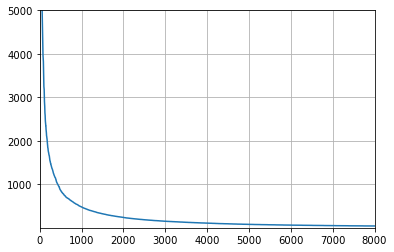

In [9]:
features=sorted_dic
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()

In [10]:
features[0][1]

123139

In [11]:
answer1=[features[i][0] for i in range(3000)]
answer1

['edu',
 'cmu',
 'com',
 'news',
 'not',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'newsgroups',
 'path',
 'can',
 'organization',
 'state',
 'gmt',
 'ohio',
 'one',
 'will',
 'writes',
 'article',
 'comp',
 'references',
 'talk',
 'misc',
 'ans',
 'howland',
 'sender',
 'reston',
 'don',
 'like',
 'people',
 'just',
 'university',
 'posting',
 'nntp',
 'mps',
 'host',
 'know',
 'get',
 'sci',
 'usenet',
 'zaphod',
 'think',
 'may',
 'alt',
 'politics',
 'also',
 'windows',
 'use',
 'time',
 'rutgers',
 'harvard',
 'eng',
 'near',
 'new',
 'rec',
 'good',
 'system',
 'soc',
 'sei',
 'crabapple',
 'noc',
 'well',
 'xref',
 'das',
 'cis',
 'even',
 'see',
 'now',
 'europa',
 'gtefsd',
 'world',
 'uunet',
 'ece',
 'gov',
 'way',
 'org',
 'god',
 'religion',
 'make',
 'much',
 'first',
 'two',
 'many',
 'say',
 'christian',
 'right',
 'rochester',
 'distribution',
 'space',
 'club',
 'want',
 'mail',
 'andrew',
 'magnesium',
 'gatech',
 'anyone',
 '

In [12]:
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

In [ ]:
x_train_dataset

In [13]:
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1

In [14]:
def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in answer1:
            #Calculating total word in feature
            l=(x_train_with_i[:,answer1.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count

In [15]:
  def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob

In [16]:
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [17]:
def predict(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [18]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [19]:
a = fit(x_train_dataset,y_train)
y_pred = predict(x_test_dataset, a)

In [20]:
a

{'total_doc': 14997,
 'comp.sys.ibm.pc.hardware': {'edu': 5089,
  'cmu': 1849,
  'com': 1813,
  'news': 1035,
  'not': 693,
  'srv': 1146,
  'cantaloupe': 837,
  'net': 950,
  'message': 792,
  'subject': 759,
  'lines': 757,
  'date': 793,
  'apr': 799,
  'newsgroups': 754,
  'path': 733,
  'can': 710,
  'organization': 718,
  'state': 584,
  'gmt': 662,
  'ohio': 536,
  'one': 429,
  'will': 435,
  'writes': 285,
  'article': 283,
  'comp': 1306,
  'references': 316,
  'talk': 10,
  'misc': 173,
  'ans': 450,
  'howland': 443,
  'sender': 369,
  'reston': 443,
  'don': 238,
  'like': 297,
  'people': 91,
  'just': 313,
  'university': 356,
  'posting': 366,
  'nntp': 366,
  'mps': 324,
  'host': 351,
  'know': 298,
  'get': 333,
  'sci': 8,
  'usenet': 298,
  'zaphod': 301,
  'think': 174,
  'may': 118,
  'alt': 28,
  'politics': 0,
  'also': 263,
  'windows': 265,
  'use': 336,
  'time': 177,
  'rutgers': 10,
  'harvard': 194,
  'eng': 295,
  'near': 210,
  'new': 197,
  'rec': 5,
 

In [21]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred))
print("***************************************************************************")
print("Classification Report\n",classification_report(y_test, y_pred))
print("***************************************************************************")
print("SCORE: ",accuracy_score(y_test, y_pred))

Confusion Matrix
 [[209   2   1   0   0   0   0   0   0   1   0   0   2   0   0   2   0   0
    0  19]
 [  0 165  23  14  11   7   6   1   0   0   0   1   3   2   0   0   0   0
    0   0]
 [  0  12 202  18   0  13   5   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   1   3 232  29   0   2   0   0   0   0   0   6   0   0   0   0   0
    0   0]
 [  0   2   1  11 223   0   4   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0  17  32   8   5 191   1   0   0   0   0   0   3   0   0   0   0   0
    0   0]
 [  0   0   0   5   1   0 219   5   0   0   0   0   3   2   0   0   1   0
    0   0]
 [  0   0   0   0   0   0   9 231   7   0   0   0   3   0   0   0   3   0
    0   0]
 [  0   2   0   0   0   0   1   3 232   0   0   0   0   1   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   3   0   0 248   4   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   0   0   4 233   0   0   0   0   0   0   0
    1   0]
 [  0   4   1   0   0   0   0   0   0   0   0 2

In [22]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_dataset,y_train)
Y_Pred = model.predict(x_test_dataset)

In [23]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print("Confusion Matrix\n",confusion_matrix(y_test, Y_Pred))
print("***************************************************************************")
print("Classification Report\n",classification_report(y_test, Y_Pred))
print("***************************************************************************")
print("SCORE: ",accuracy_score(y_test, Y_Pred))

Confusion Matrix
 [[203   0   1   0   0   0   0   0   1   0   0   0   2   0   0   2   0   0
    0  27]
 [  0 149  30  19  10   7   9   3   1   0   0   1   1   3   0   0   0   0
    0   0]
 [  0   5 211  15   3  12   5   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   2   5 218  36   2   4   1   1   0   0   0   4   0   0   0   0   0
    0   0]
 [  0   2   1  17 218   0   3   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0  15  34   9   8 177   4   0   3   1   0   0   4   0   2   0   0   0
    0   0]
 [  0   1   0   5   2   0 217   6   0   0   1   0   2   0   1   0   1   0
    0   0]
 [  0   0   0   0   1   0  12 222  10   1   1   0   3   0   0   0   2   0
    1   0]
 [  0   0   0   0   0   1   1   2 235   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   5   1   1 242   5   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   1   0   3   1   1   8 226   0   0   0   0   0   0   0
    0   0]
 [  0   2   4   0   0   2   1   0   0   0   0 2

## # ##### Result :

I perform a testing dataset in both algo Sklearn and self implementation.

Sklearn gave 0.85 score with testing dataset And Self implemented gave 0.86 score with same testing dataset.